In [44]:
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [45]:
train_dataset = h5py.File('datasets/train_signs.h5', 'r')
test_dataset =  h5py.File('datasets/test_signs.h5', 'r')

In [46]:
it = iter(test_dataset)
for i in range(3):
    print(next(it)) 

list_classes
test_set_x
test_set_y


In [47]:
x_train = tf.data.Dataset.from_tensor_slices(train_dataset['train_set_x'])
y_train = tf.data.Dataset.from_tensor_slices(train_dataset['train_set_y'])

x_test = tf.data.Dataset.from_tensor_slices(test_dataset['test_set_x'])
y_test = tf.data.Dataset.from_tensor_slices(test_dataset['test_set_y'])

In [48]:
64*64*3

12288

In [49]:
next(iter(x_train))

<tf.Tensor: shape=(64, 64, 3), dtype=uint8, numpy=
array([[[227, 220, 214],
        [227, 221, 215],
        [227, 222, 215],
        ...,
        [232, 230, 224],
        [231, 229, 222],
        [230, 229, 221]],

       [[227, 221, 214],
        [227, 221, 215],
        [228, 221, 215],
        ...,
        [232, 230, 224],
        [231, 229, 222],
        [231, 229, 221]],

       [[227, 221, 214],
        [227, 221, 214],
        [227, 221, 215],
        ...,
        [232, 230, 224],
        [231, 229, 223],
        [230, 229, 221]],

       ...,

       [[119,  81,  51],
        [124,  85,  55],
        [127,  87,  58],
        ...,
        [210, 211, 211],
        [211, 212, 210],
        [210, 211, 210]],

       [[119,  79,  51],
        [124,  84,  55],
        [126,  85,  56],
        ...,
        [210, 211, 210],
        [210, 211, 210],
        [209, 210, 209]],

       [[119,  81,  51],
        [123,  83,  55],
        [122,  82,  54],
        ...,
        [209, 210, 210]

In [50]:
def normalize(image):
    image = tf.cast(image, tf.float32) / 255
    image = tf.reshape(image, [-1,])
    print(image)
    return image

In [51]:
new_train = x_train.map(normalize)
new_test = x_test.map(normalize)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Tensor("Reshape:0", shape=(12288,), dtype=float32)
Tensor("Reshape:0", shape=(12288,), dtype=float32)


(-0.5, 63.5, 63.5, -0.5)

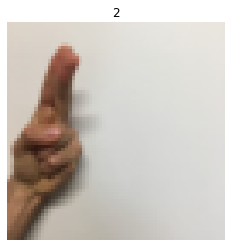

In [52]:
index = 666
it_tr = iter(x_train)
it_label = iter(y_train)

for i in range(index):
    tr = next(it_tr)
    label =next(it_label)

plt.imshow(tr.numpy().astype('uint8'))
plt.title(label.numpy().astype('uint8'))
plt.axis('off')

In [53]:
def one_hot_matrix(label):
    return tf.one_hot(label, 6)

In [54]:
new_y_train = y_train.map(one_hot_matrix)
new_y_test = y_test.map(one_hot_matrix)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [55]:
next(iter(y_test))

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [56]:
next(iter(new_y_test))

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0.], dtype=float32)>

In [57]:
# ===========================================================

In [58]:
def initialize_parameters():
    initializer = tf.keras.initializers.GlorotNormal(seed=1) 
    
    W1 = tf.Variable(initializer(shape=(25,12288)))
    b1 = tf.Variable(initializer(shape=(25,1)))

    W2 = tf.Variable(initializer(shape=(12,25)))
    b2 = tf.Variable(initializer(shape=(12,1)))
    
    W3 = tf.Variable(initializer(shape=(6,12)))
    b3 = tf.Variable(initializer(shape=(6,1)))
    
    parameters = {
        'W1': W1,
        'b1': b1,
        
        'W2': W2,
        'b2': b2,
        
        'W3': W3,
        'b3': b3
    }
    
    return parameters

In [59]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.math.add(tf.matmul(W1, X) ,b1)
    A1 = tf.keras.activations.relu(Z1)

    Z2 = tf.math.add(tf.matmul(W2, A1), b2)
    A2 = tf.keras.activations.relu(Z2)
    
    Z3 =tf.math.add(tf.matmul(W3, A2), b3)
    
    return Z3
    

In [60]:
def compute_cost(logits, labels):
    logits = tf.transpose(logits)
    labels = tf.reshape(tf.transpose(labels),[logits.shape[0],6])
    cost =  tf.reduce_mean(tf.keras.losses.categorical_crossentropy(labels, logits,from_logits=True))
    return cost

In [61]:
def model(X_train, Y_train, X_test, Y_test):
    
    parameters = initialize_parameters()
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    minibatch_size = 32
    dataset = tf.data.Dataset.zip((X_train, Y_train))
    test_dataset = tf.data.Dataset.zip((X_test, Y_test))
    
    minibatches = dataset.batch(minibatch_size)
    test_minibatches = test_dataset.batch(minibatch_size)
    
    train_accuracy = tf.keras.metrics.CategoricalAccuracy()
    test_accuracy = tf.keras.metrics.CategoricalAccuracy()
    
    learning_rate = 0.0001
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    
    m = dataset.cardinality().numpy()
    
    costs = []                                        
    train_acc = []
    test_acc = []
    
    
    
    num_epochs = 200
    for epoch in range(num_epochs):
        train_accuracy.reset_states()
        epoch_cost = 0
        
        for (minibatch_X, minibatch_Y) in minibatches:
            with tf.GradientTape() as tape:
                Z3 = forward_propagation(tf.transpose(minibatch_X), parameters)
                minibatch_cost = compute_cost(Z3, tf.transpose(minibatch_Y))
            
            train_accuracy.update_state(minibatch_Y, tf.transpose(Z3))
            trainable_variables = [W1, b1, W2, b2, W3, b3]
            grads = tape.gradient(minibatch_cost, trainable_variables)
            optimizer.apply_gradients(zip(grads, trainable_variables))
            epoch_cost += minibatch_cost
        epoch_cost /= m
        
        if epoch % 10 == 0:
            print ('Cost after epoch %i: %f' % (epoch, epoch_cost))
            print('Train accuracy:', train_accuracy.result())
            
            for (minibatch_X, minibatch_Y) in test_minibatches:
                Z3 = forward_propagation(tf.transpose(minibatch_X), parameters)
                test_accuracy.update_state(minibatch_Y, tf.transpose(Z3))
            print('Test_accuracy:', test_accuracy.result())
            
            costs.append(epoch_cost)
            train_acc.append(train_accuracy.result())
            test_acc.append(test_accuracy.result())
            test_accuracy.reset_states()
    
    
    
    return parameters, costs, train_acc, test_acc
        
    
    



In [62]:
parameters, costs, train_acc, test_acc = model(new_train, new_y_train, new_test, new_y_test)

Cost after epoch 0: 0.057942
Train accuracy: tf.Tensor(0.19814815, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.225, shape=(), dtype=float32)
Cost after epoch 10: 0.048327
Train accuracy: tf.Tensor(0.4037037, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.475, shape=(), dtype=float32)
Cost after epoch 20: 0.041818
Train accuracy: tf.Tensor(0.5037037, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.5416667, shape=(), dtype=float32)
Cost after epoch 30: 0.037339
Train accuracy: tf.Tensor(0.5824074, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.55, shape=(), dtype=float32)
Cost after epoch 40: 0.034142
Train accuracy: tf.Tensor(0.6148148, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.60833335, shape=(), dtype=float32)
Cost after epoch 50: 0.031587
Train accuracy: tf.Tensor(0.6527778, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.6166667, shape=(), dtype=float32)
Cost after epoch 60: 0.029399
Train accuracy: tf.Tensor(0.6814815, shape=(), dtype=float32)
Te

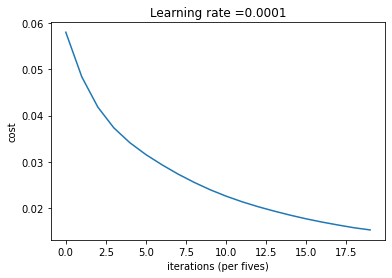

In [63]:
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
plt.show()

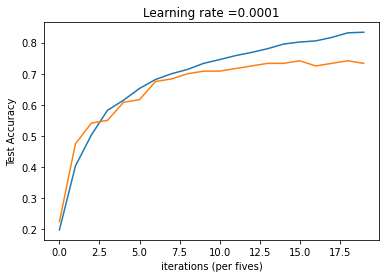

In [64]:
plt.plot(np.squeeze(train_acc))
plt.ylabel('Train Accuracy')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))

plt.plot(np.squeeze(test_acc))
plt.ylabel('Test Accuracy')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
plt.show()

index: 11
tf.Tensor(
[[ 1.1601087 ]
 [ 8.188594  ]
 [ 7.5095716 ]
 [-0.12909454]
 [-0.33174098]
 [ 2.3421557 ]], shape=(6, 1), dtype=float32)
prediction: 1


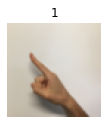

In [79]:
def predict(index, parameters, data, labels, new_data):
    data = iter(data)
    labels = iter(labels)
    
    for i in range(index + 1):
        selected_data = next(data)
        selected_labels = next(labels)
    
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(5, 5,  10)
    plt.imshow(selected_data.numpy().astype("uint8"))
    plt.title(selected_labels.numpy().astype("uint8"))
    plt.axis("off")
    
    c = 0
    X = new_data.batch(1)
    for i in X:
        if c == index:
            print('index:', c)
            Z3 = forward_propagation(tf.transpose(i), parameters)
            print(Z3)
            print('prediction:' ,np.argmax(Z3))
            break
        else:
            c = c+1
    
    
predict(11, parameters, x_test, y_test, new_test)